In [1]:
%pip install pandas numpy matplotlib seaborn scikit-learn requests

import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt
import seaborn as sns
import os
import requests


Note: you may need to restart the kernel to use updated packages.


In [2]:
# World Bank API URL for GDP per capita (2000-2023)
url = "https://api.worldbank.org/v2/country/all/indicator/NY.GDP.PCAP.CD?date=2000:2023&format=json&per_page=10000"

# Fetch data from API
response = requests.get(url)
data = response.json()

# Extract GDP data
gdp_list = []
for entry in data[1]:  # API structure: data[1] contains actual records
    if entry["value"] is not None:  # Ignore missing GDP values
        gdp_list.append({ 
            "Country": entry["country"]["value"],
            "Year": int(entry["date"]),
            "GDP per Capita": entry["value"]
        })

# Convert to DataFrame
gdp_df = pd.DataFrame(gdp_list)

# Save to CSV for later use
gdp_df.to_csv("gdp_per_capita.csv", index=False)

print("GDP Data Scraped Successfully!")
gdp_df.head(5)

GDP Data Scraped Successfully!


,Country,Year,GDP per Capita
0,Africa Eastern and Southern,2023,1659.515290
1,Africa Eastern and Southern,2022,1628.024526
2,Africa Eastern and Southern,2021,1522.590088
3,Africa Eastern and Southern,2020,1344.080962
4,Africa Eastern and Southern,2019,1493.780445


In [3]:
gdp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6179 entries, 0 to 6178
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country         6179 non-null   object 
 1   Year            6179 non-null   int64  
 2   GDP per Capita  6179 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 144.9+ KB


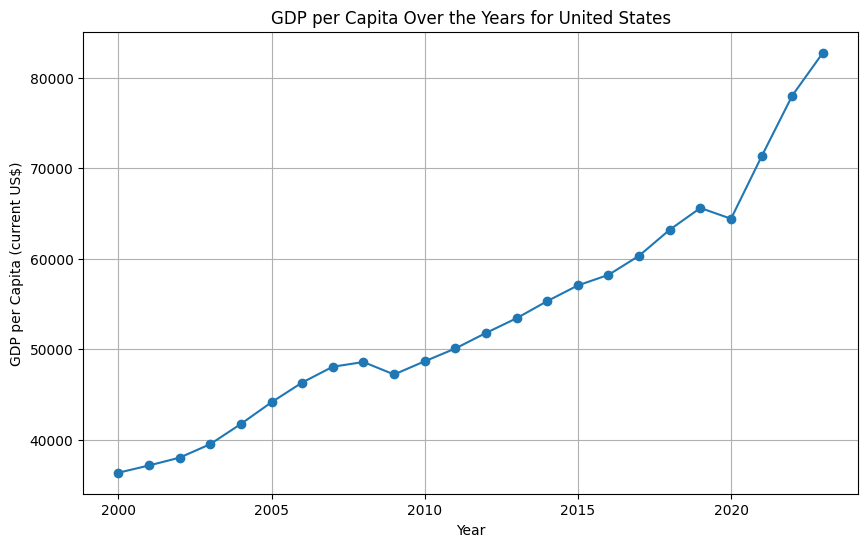

In [4]:
# Filter data for a specific country, e.g., 'United States'
country_data = gdp_df[gdp_df['Country'] == 'United States']

# Plot GDP per Capita over the years
plt.figure(figsize=(10, 6))
plt.plot(country_data['Year'], country_data['GDP per Capita'], marker='o')
plt.title('GDP per Capita Over the Years for United States')
plt.xlabel('Year')
plt.ylabel('GDP per Capita (current US$)')
plt.grid(True)
plt.show()

In [8]:
# Air Quality Index inport data gathering and loading method
AQI = pd.read_csv('Project 2/AIR QUALITY INDEX- top countries.csv', index_col=False)

FileNotFoundError: [Errno 2] No such file or directory: 'Project 2/AIR QUALITY INDEX- top countries.csv'